In [16]:
import ast
import pandas as pd
from datasets import load_dataset
import ast
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns


dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_da_fr = df[(df["job_title"] == "Data Analyst") & (df["job_country"] == "France")].copy()

In [3]:
df_da_fr["job_posted_month_num"] = df_da_fr["job_posted_date"].dt.month

In [4]:
df_da_fr_explode = df_da_fr.explode("job_skills")

In [5]:
df_da_fr_pivot = df_da_fr_explode.pivot_table(index="job_posted_month_num", columns="job_skills", aggfunc="size", fill_value=0)
df_da_fr_pivot.loc["Total"] = df_da_fr_pivot.sum()
df_da_fr_pivot = df_da_fr_pivot[df_da_fr_pivot.loc["Total"].sort_values(ascending=False).index]
df_da_fr_pivot = df_da_fr_pivot.drop("Total")

df_da_fr_pivot

job_skills,sql,python,tableau,power bi,excel,sas,r,azure,gcp,vba,...,dynamodb,react,powerbi,flutter,pascal,outlook,neo4j,laravel,mongo,ms access
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,88,57,44,33,30,50,17,8,9,7,...,0,0,0,0,0,0,0,0,0,0
2,85,55,46,44,32,36,19,11,8,11,...,0,0,0,0,0,0,0,0,0,0
3,86,59,48,41,25,18,26,10,6,6,...,0,1,0,1,0,0,0,1,0,0
4,67,47,30,38,26,24,19,15,10,9,...,0,0,0,0,0,0,0,0,0,0
5,73,61,44,30,22,20,22,9,15,11,...,0,0,0,0,0,0,0,0,0,1
6,55,42,25,27,16,12,16,8,8,6,...,0,0,0,0,0,1,0,0,0,0
7,48,28,24,22,12,4,13,8,7,3,...,0,0,0,0,1,0,0,0,0,0
8,60,49,28,33,18,18,11,17,4,5,...,1,0,1,0,0,0,0,0,0,0
9,21,19,13,17,14,6,5,2,3,6,...,0,0,0,0,0,0,1,0,1,0


In [6]:
da_total = df_da_fr.groupby("job_posted_month_num").size()

In [7]:
df_da_fr_percent =df_da_fr_pivot.div(da_total/100,axis=0)

In [8]:
df_da_fr_percent = df_da_fr_percent.reset_index()
df_da_fr_percent["job_posted_month"] = df_da_fr_percent["job_posted_month_num"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_da_fr_percent = df_da_fr_percent.set_index("job_posted_month")
df_da_fr_percent = df_da_fr_percent.drop(columns="job_posted_month_num")

df_da_fr_percent

job_skills,sql,python,tableau,power bi,excel,sas,r,azure,gcp,vba,...,dynamodb,react,powerbi,flutter,pascal,outlook,neo4j,laravel,mongo,ms access
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.411348,40.425532,31.205674,23.404255,21.276596,35.460993,12.056738,5.673759,6.382979,4.964539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,57.046980,36.912752,30.872483,29.530201,21.476510,24.161074,12.751678,7.382550,5.369128,7.382550,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,56.209150,38.562092,31.372549,26.797386,16.339869,11.764706,16.993464,6.535948,3.921569,3.921569,...,0.000000,0.653595,0.000000,0.653595,0.000000,0.000000,0.000000,0.653595,0.000000,0.000000
Apr,51.538462,36.153846,23.076923,29.230769,20.000000,18.461538,14.615385,11.538462,7.692308,6.923077,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,54.074074,45.185185,32.592593,22.222222,16.296296,14.814815,16.296296,6.666667,11.111111,8.148148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.740741
Jun,59.139785,45.161290,26.881720,29.032258,17.204301,12.903226,17.204301,8.602151,8.602151,6.451613,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.075269,0.000000,0.000000,0.000000,0.000000
Jul,80.000000,46.666667,40.000000,36.666667,20.000000,6.666667,21.666667,13.333333,11.666667,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,63.157895,51.578947,29.473684,34.736842,18.947368,18.947368,11.578947,17.894737,4.210526,5.263158,...,1.052632,0.000000,1.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,35.593220,32.203390,22.033898,28.813559,23.728814,10.169492,8.474576,3.389831,5.084746,10.169492,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.694915,0.000000,1.694915,0.000000


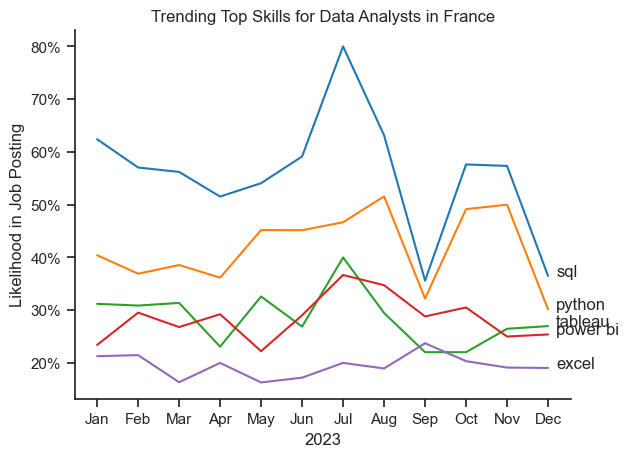

In [17]:
df_plot = df_da_fr_percent.iloc[:, :5]
sns.lineplot(df_plot,dashes=False,palette="tab10")
sns.set_theme(style="ticks")
sns.despine()

plt.title("Trending Top Skills for Data Analysts in France")
plt.ylabel("Likelihood in Job Posting")
plt.xlabel("2023")
plt.legend().remove()

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i], df_plot.columns[i])